In [231]:
from matplotlib import pyplot
import numpy as np

In [243]:
def logisticEq(xn, r):
  return r*xn*(1 - xn)

def logisticEvol(x0, r, N):
  xns = []
  xn = x0
  for i in range(N):
    xns.append(xn)
    xnp = logisticEq(xn, r)
    xn = xnp

  return xns

def multiPlot(rs, x0s, ax):
  for i, r in enumerate(rs):
    xns = logisticEvol(x0s[i], r, 50)
    ax.plot(xns)

def plotStacked(rs, x0s):
  fig, ax = pyplot.subplots(1, 1)
  multiPlot(rs, x0s, ax)

def plot(rs, x0s):
  axs = (pyplot.figure(constrained_layout=True)
       .subplots(len(rs), 1, sharex=True, sharey=True))

  for i, r in enumerate(rs):
    multiPlot([rs[i]], [x0s[i]], axs[i])
  pyplot.show()


### Taxa de Crescimento

Em uma dinâmica populacional, existem 2 condições iniciais: a taxa de crescimento (r) e a população inicial (x0)

Nos gráficos abaixo podemos ver que variações nas taxas de crescimento apresentam variados comportamentos
Em populações cuja taxa de crescimento é baixa (< 1) a população inevitavelmente se extinguirá em algum momento
Dependendo de r a população pode também convergir para um valor único ou para um conjunto de valores, oscilando entre eles
No último gráfico a evolução é mais complexa pois, apesar de oscilar, a periodicidade não é visível no tempo escolhido

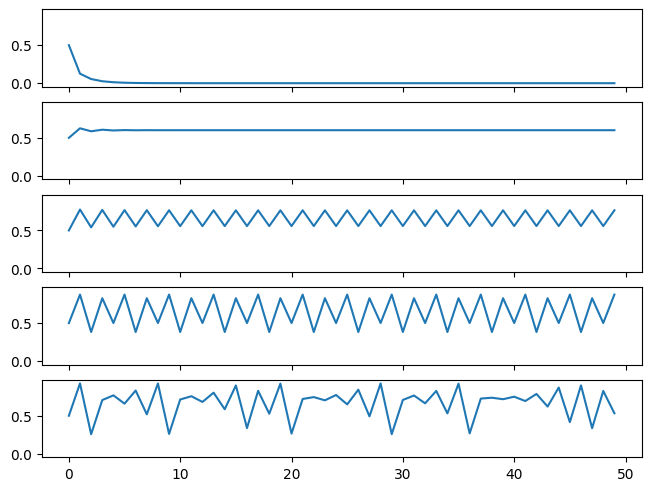

In [244]:
rs = [0.5, 2.5, 3.1, 3.5, 3.7]

plot(rs, [0.5]*len(rs))

### População Inicial

A seguir podem ser vistos os mesmos gráficos anteriores, porém com diferentes valores de população inicial.

Os primeiros gráficos apresentam comportamentos semelhantes aos apontados anteriormente, além de que os gráficos oscilatórios apresentam uma mudança de fase em sua oscilação. O último gráfico novamente apresenta uma imprevisibilidade ao se variar a população inicial

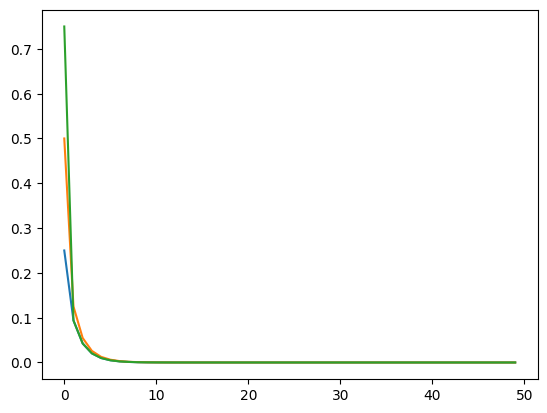

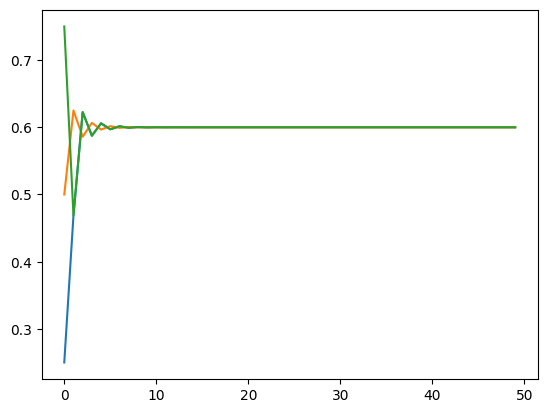

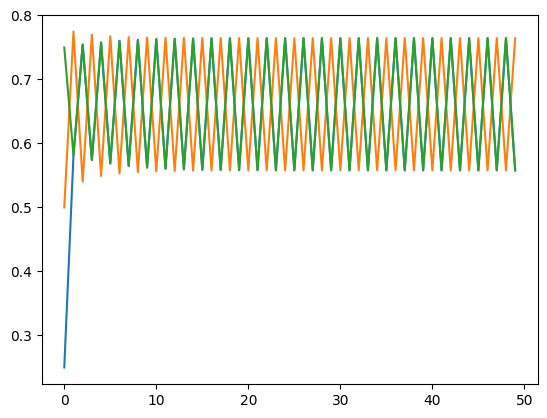

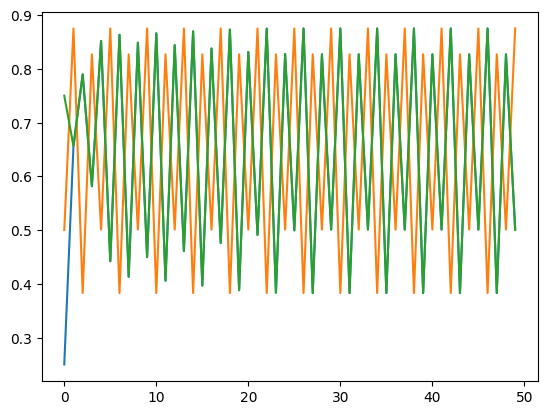

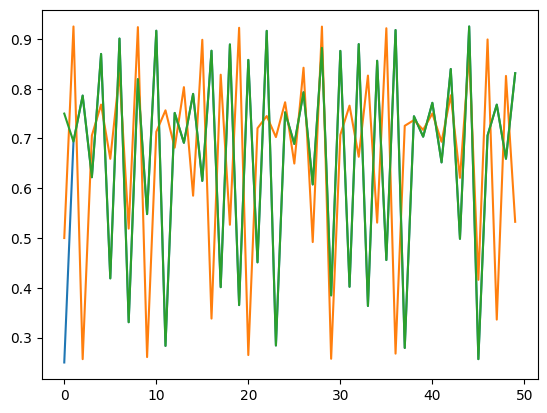

In [234]:
for r in rs:
  x0s = [0.25, 0.5, 0.75]
  plotStacked([r]*len(x0s), x0s)

### Variação Infinitesimal

Ao variar a população inicial em valores pequenos, a mudança de fase citada anteriormente quase não pode ser notada.
Já no último gráfico pode-se ver que mesmo variações pequenas resultam em valores finais de população distintos, sendo essa a marca de um comportamento caótico

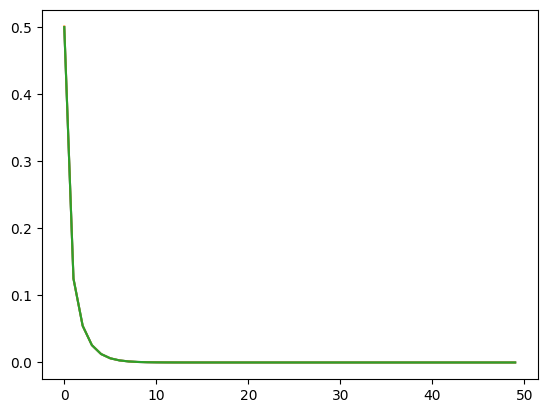

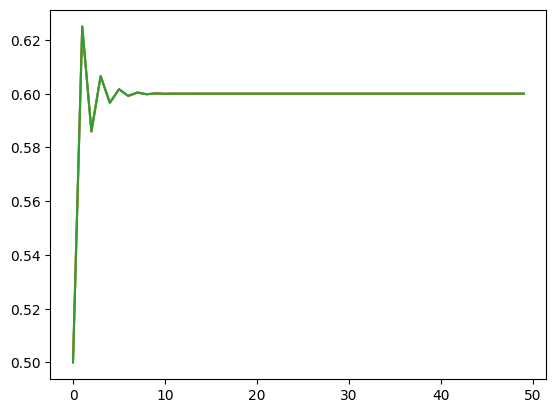

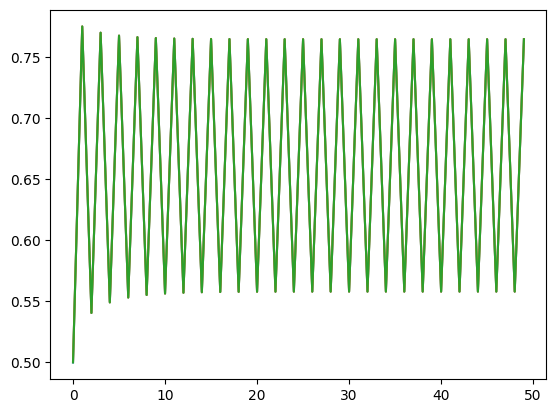

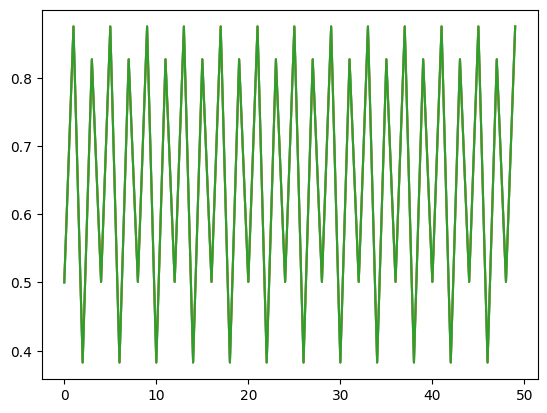

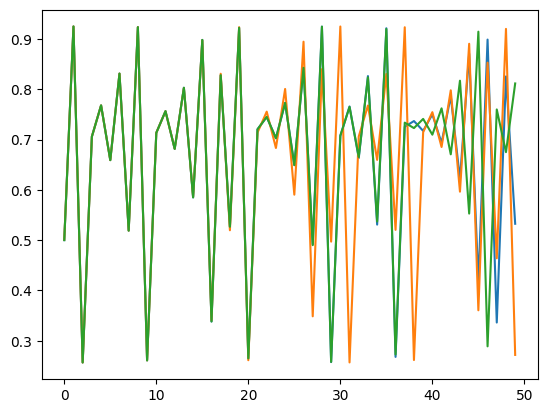

In [235]:
x0s = [0.5, 0.501, 0.5001]

for r in rs:
  plotStacked([r]*len(x0s), x0s)

In [236]:
def bifurcDiagram(r0, rf, num):
  rs = np.linspace(r0, rf, num)
  y = []

  for r in rs:
    xns = logisticEvol(0.5, r, 1000)

    y.append(xns[900:1001])

  return rs, y

def plotBifurcDiagram(rs, y, ylim = [0, 1]):
  fig, ax = pyplot.subplots(1, 1)

  ax.set_ylim(ylim)
  ax.plot(rs, y, marker='.', color='black', markersize=0.005, linewidth=0.005, markeredgecolor='none')

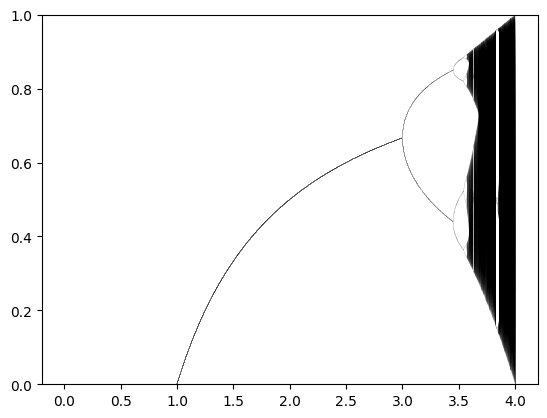

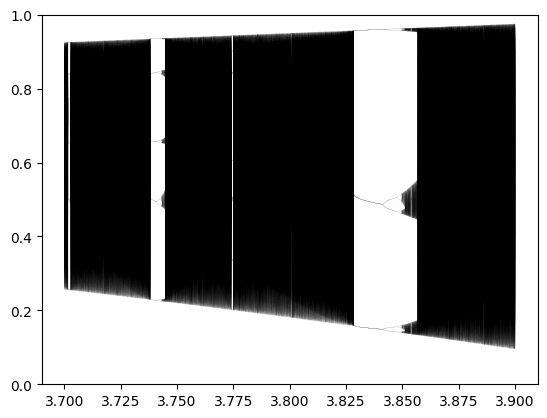

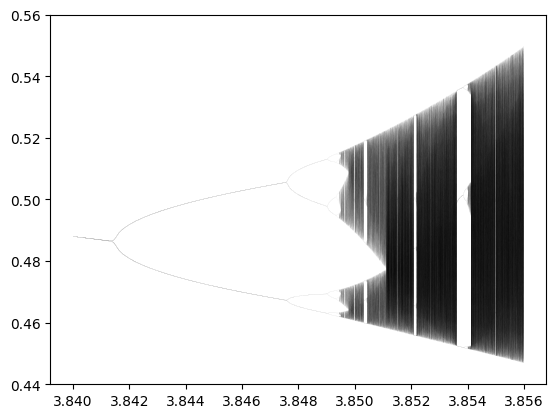

In [237]:
rs, y = bifurcDiagram(10**(-5), 4, 10000)

plotBifurcDiagram(rs, y)

rs, y = bifurcDiagram(3.7, 3.9, 10000)

plotBifurcDiagram(rs, y)

rs, y = bifurcDiagram(3.840, 3.856, 10000)

plotBifurcDiagram(rs, y, [0.44, 0.56])

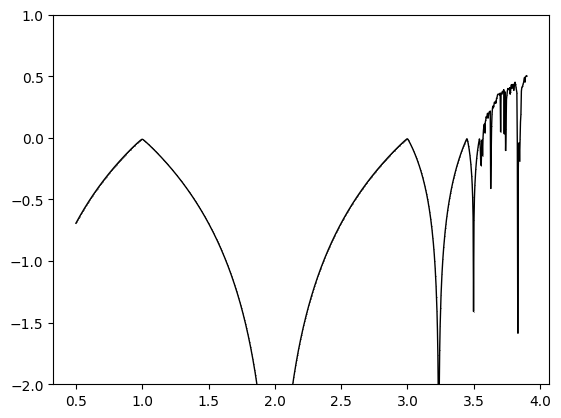

In [246]:
def logisticDerivative(xn, r):
  return r*(1 - 2*xn)

def liapunov(x0, r, nlim):
  xns = logisticEvol(x0, r, nlim)
  derivatives = [ logisticDerivative(xn, r) for xn in xns[1:] ]

  values = np.log(np.abs(derivatives))

  return np.sum(values)/nlim

def plotLiapunov(x0, nlim):
  lamb = []
  rs = np.linspace(0.5, 3.9, 1000)
  for r in rs:
    lamb.append(liapunov(0.5, r, nlim))

  fig, ax = pyplot.subplots(1, 1)

  ax.set_ylim(-2)
  ax.plot(rs, lamb, marker='.', color='black', markersize=1, linewidth=1, markeredgecolor='none')

plotLiapunov(0.5, 1000)